#### Google Play Store Dataset

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import missingno as msno
import autoreload
import matplotlib.pyplot as plt
import csv
import os
import sys

from collections import defaultdict, Counter
from pandas_profiling import ProfileReport as pr

sb.set_style("darkgrid")
sb.set(font_scale=1.2)

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_row", 1000)

%matplotlib inline
%reload_ext autoreload
%autoreload 2


In [131]:
df = pd.read_csv(r"D:\Open Classroom\Datasets\Google Play Store Dataset\android-games.csv")
df.head()

rank                                         title  total ratings installs  \
0     1                  Garena Free Fire - The Cobra       80678661  500.0 M   
1     2                   PUBG MOBILE: Graffiti Prank       35971961  100.0 M   
2     3                     Mobile Legends: Bang Bang       25836869  100.0 M   
3     4                                   Brawl Stars       17181659  100.0 M   
4     5  Sniper 3D: Fun Free Online FPS Shooting Game       14237554  100.0 M   

   average rating  growth (30 days)  growth (60 days)  price     category  \
0            4.33               2.9               7.9    0.0  GAME ACTION   
1            4.24               2.0               3.1    0.0  GAME ACTION   
2            4.08               1.6               3.3    0.0  GAME ACTION   
3            4.27               4.1               6.6    0.0  GAME ACTION   
4            4.33               0.8               1.8    0.0  GAME ACTION   

   5 star ratings  4 star ratings  3 star ratings  2 star ratings  \
0        61935712         4478738         2795172         1814999   
1        26670566         2109631         1352610          893674   
2        17850942         1796761         1066095          725429   
3        12493668         1474319          741410          383478   
4         9657878         2124544         1034025          375159   

   1 star ratings   paid  
0         9654037  False  
1         4945478  False  
2         4397640  False  
3         2088781  False  
4         1045945  False

In [108]:
df.isnull().sum()

rank                0
title               0
total ratings       0
installs            0
average rating      0
growth (30 days)    0
growth (60 days)    0
price               0
category            0
5 star ratings      0
4 star ratings      0
3 star ratings      0
2 star ratings      0
1 star ratings      0
paid                0
dtype: int64

In [109]:
round(df.describe(), 2)

rank  total ratings  average rating  growth (30 days)  \
count  1830.00   1.830000e+03         1830.00           1830.00   
mean     50.48   2.037474e+06            4.31            216.85   
std      28.94   7.410657e+06            0.25           4799.40   
min       1.00   3.823800e+04            3.09              0.00   
25%      25.00   2.062362e+05            4.18              0.10   
50%      51.00   4.795065e+05            4.33              0.50   
75%      75.75   1.112633e+06            4.49              1.70   
max     100.00   1.328202e+08            4.91         140394.40   

       growth (60 days)    price  5 star ratings  4 star ratings  \
count           1830.00  1830.00         1830.00         1830.00   
mean               3.90     0.01      1459202.09       215550.20   
std               18.40     0.24      5295054.53       702254.19   
min                0.00     0.00        21898.00         2441.00   
25%                0.30     0.00       145203.25        23545.50   
50%                1.10     0.00       334526.00        58234.00   
75%                3.38     0.00       787668.25       132629.00   
max              605.10     7.49     89826657.00     13399678.00   

       3 star ratings  2 star ratings  1 star ratings  
count         1830.00         1830.00         1830.00  
mean        107260.15        52928.19       202530.95  
std         385055.45       215174.46       889663.73  
min            707.00          288.00          527.00  
25%          10826.00         4803.50        14491.25  
50%          28871.00        12660.00        38611.50  
75%          66986.25        30659.25       104251.25  
max        7742411.00      4404948.00     17446463.00

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1830 non-null   int64  
 1   title             1830 non-null   object 
 2   total ratings     1830 non-null   int64  
 3   installs          1830 non-null   object 
 4   average rating    1830 non-null   float64
 5   growth (30 days)  1830 non-null   float64
 6   growth (60 days)  1830 non-null   float64
 7   price             1830 non-null   float64
 8   category          1830 non-null   object 
 9   5 star ratings    1830 non-null   int64  
 10  4 star ratings    1830 non-null   int64  
 11  3 star ratings    1830 non-null   int64  
 12  2 star ratings    1830 non-null   int64  
 13  1 star ratings    1830 non-null   int64  
 14  paid              1830 non-null   bool   
dtypes: bool(1), float64(4), int64(7), object(3)
memory usage: 202.1+ KB


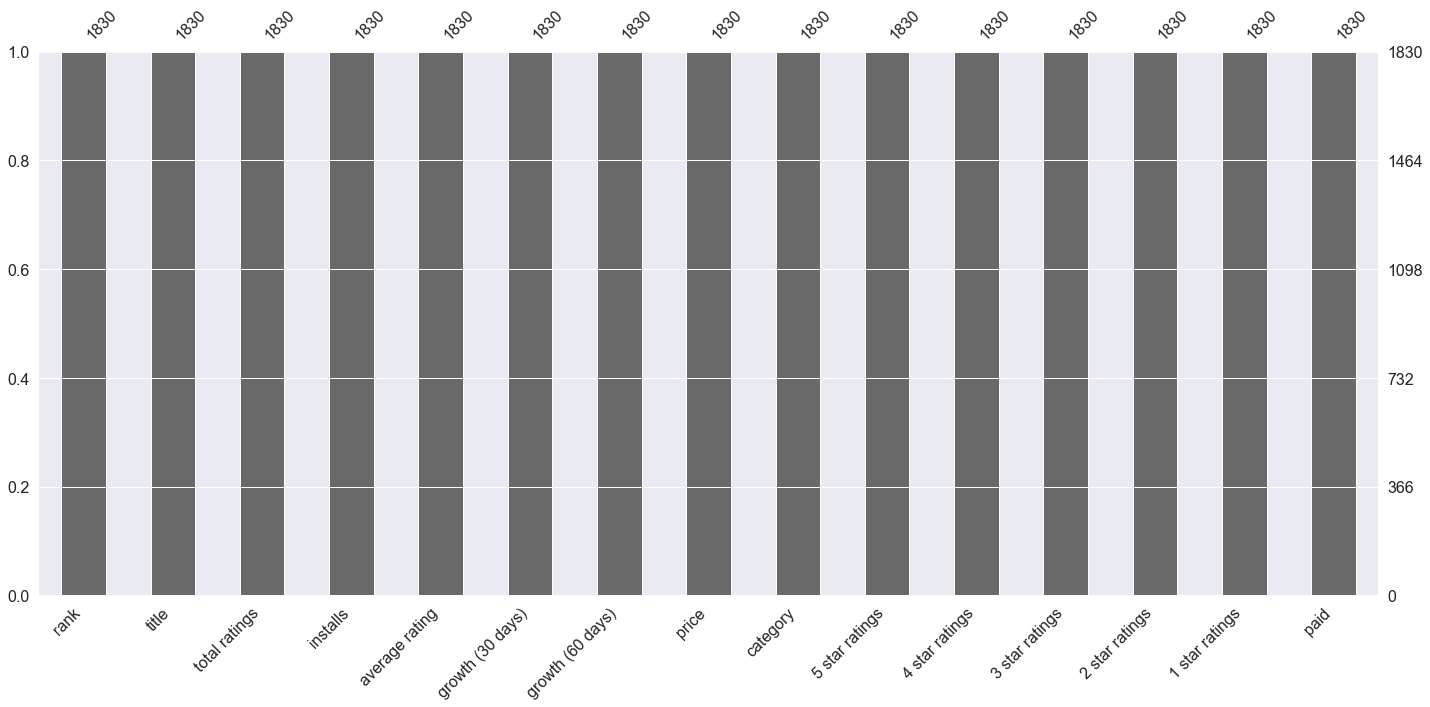

In [111]:
msno.bar(df)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 <a list of 12 Text major ticklabel objects>)

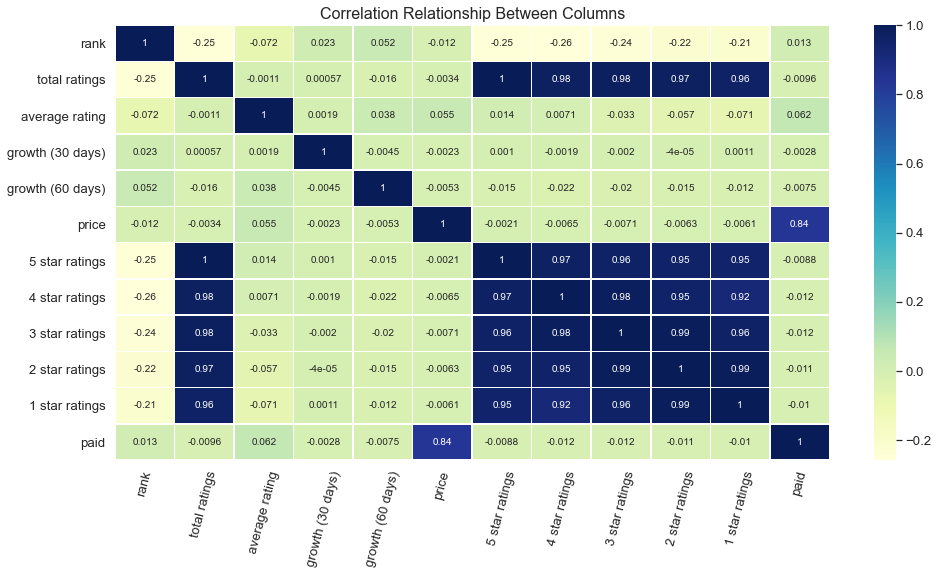

In [112]:
plt.figure(figsize = (16, 8))
sb.heatmap(df.corr(), annot = True, linewidths=0.5, cmap = "YlGnBu")
plt.title("Correlation Relationship Between Columns", fontsize = (16))
plt.xticks(rotation = 75)

In [113]:
pr(df)

In [114]:
df.head()

rank                                         title  total ratings installs  \
0     1                  Garena Free Fire - The Cobra       80678661  500.0 M   
1     2                   PUBG MOBILE: Graffiti Prank       35971961  100.0 M   
2     3                     Mobile Legends: Bang Bang       25836869  100.0 M   
3     4                                   Brawl Stars       17181659  100.0 M   
4     5  Sniper 3D: Fun Free Online FPS Shooting Game       14237554  100.0 M   

   average rating  growth (30 days)  growth (60 days)  price     category  \
0            4.33               2.9               7.9    0.0  GAME ACTION   
1            4.24               2.0               3.1    0.0  GAME ACTION   
2            4.08               1.6               3.3    0.0  GAME ACTION   
3            4.27               4.1               6.6    0.0  GAME ACTION   
4            4.33               0.8               1.8    0.0  GAME ACTION   

   5 star ratings  4 star ratings  3 star ratings  2 star ratings  \
0        61935712         4478738         2795172         1814999   
1        26670566         2109631         1352610          893674   
2        17850942         1796761         1066095          725429   
3        12493668         1474319          741410          383478   
4         9657878         2124544         1034025          375159   

   1 star ratings   paid  
0         9654037  False  
1         4945478  False  
2         4397640  False  
3         2088781  False  
4         1045945  False

In [115]:
df["category"].value_counts()

GAME CARD            122
GAME WORD            106
GAME CASUAL          102
GAME ROLE PLAYING    100
GAME RACING          100
GAME STRATEGY        100
GAME ACTION          100
GAME ARCADE          100
GAME PUZZLE          100
GAME CASINO          100
GAME SIMULATION      100
GAME MUSIC           100
GAME EDUCATIONAL     100
GAME TRIVIA          100
GAME ADVENTURE       100
GAME BOARD           100
GAME SPORTS          100
GAME FAMILY          100
Name: category, dtype: int64

In [116]:
df["installs"].value_counts()

10.0 M      795
50.0 M      266
100.0 M     256
5.0 M       248
1.0 M       191
500.0 M      34
1000.0 M     16
500.0 k      13
5000.0 M      9
100.0 k       2
Name: installs, dtype: int64

In [132]:
df[["installs", "total_installs"]] = df["installs"].str.split(" ", expand = True).get(1)
df.head()

KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

In [119]:
df.to_csv(r"D:\Open Classroom\Datasets\Google Play Store Dataset\android-games-cleaned.csv")

In [120]:
df = pd.read_csv(r"D:\Open Classroom\Datasets\Google Play Store Dataset\android-games-cleaned.csv")
df.drop(columns = ["Unnamed: 0"], inplace = True)
df.head()

rank                                         title  total ratings installs  \
0     1                  Garena Free Fire - The Cobra       80678661  500.0 M   
1     2                   PUBG MOBILE: Graffiti Prank       35971961  100.0 M   
2     3                     Mobile Legends: Bang Bang       25836869  100.0 M   
3     4                                   Brawl Stars       17181659  100.0 M   
4     5  Sniper 3D: Fun Free Online FPS Shooting Game       14237554  100.0 M   

   average rating  growth (30 days)  growth (60 days)  price     category  \
0            4.33               2.9               7.9    0.0  GAME ACTION   
1            4.24               2.0               3.1    0.0  GAME ACTION   
2            4.08               1.6               3.3    0.0  GAME ACTION   
3            4.27               4.1               6.6    0.0  GAME ACTION   
4            4.33               0.8               1.8    0.0  GAME ACTION   

   5 star ratings  4 star ratings  3 star ratings  2 star ratings  \
0        61935712         4478738         2795172         1814999   
1        26670566         2109631         1352610          893674   
2        17850942         1796761         1066095          725429   
3        12493668         1474319          741410          383478   
4         9657878         2124544         1034025          375159   

   1 star ratings   paid  
0         9654037  False  
1         4945478  False  
2         4397640  False  
3         2088781  False  
4         1045945  False

In [122]:
df["installs"].value_counts()

10.0 M      795
50.0 M      266
100.0 M     256
5.0 M       248
1.0 M       191
500.0 M      34
1000.0 M     16
500.0 k      13
5000.0 M      9
100.0 k       2
Name: installs, dtype: int64